In [1]:
# Prerequisites 

from pathlib import Path
import pandas as pd
from ordered_set import OrderedSet
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
import json
from yaml.loader import SafeLoader
import cobra
from cobra.io import load_model
from cobra import Model, Reaction, Metabolite
from pathlib import Path
from cobra.io import load_json_model, save_json_model, load_matlab_model, save_matlab_model, read_sbml_model, write_sbml_model, load_model, load_yaml_model, save_yaml_model
import logging
from cobra.sampling import sample
from cobra.medium import minimal_medium
import ast
import sys
import numpy as np

# load dataframe with growing pathways

In [2]:
# read data fram of growing pathways
growth_csv = pd.read_csv('final.csv')
growth_csv['INTERMEDIATE NAMES'] = [ast.literal_eval(i) for i in growth_csv['INTERMEDIATE NAMES']]
growth_csv['INTERMEDIATES KEGG'] = [ast.literal_eval(i) for i in growth_csv['INTERMEDIATES KEGG']]

In [3]:
growth_csv

,LENGTH,INTERMEDIATES KEGG,INTERMEDIATE NAMES,solution
0,6,"[C06793, C20609, C00288, C00222, C10020, C0460...","[Vinyl chloride, 2-Chloroacrylate, H2CO3, 3-Ox...",9.379374e+00
1,6,"[C06793, C06614, C06613, C01471, C05608, C0656...","[Vinyl chloride, trans-3-Chloroacrylic acid, t...",1.186644e-17
2,6,"[C06793, C06614, C00288, C00222, C10020, C0460...","[Vinyl chloride, trans-3-Chloroacrylic acid, H...",9.379374e+00
3,6,"[C06793, C20609, C00288, C00222, C10020, C0460...","[Vinyl chloride, 2-Chloroacrylate, H2CO3, 3-Ox...",9.379374e+00
4,6,"[C06793, C06614, C00288, C00222, C10020, C0460...","[Vinyl chloride, trans-3-Chloroacrylic acid, H...",9.379374e+00
5,6,"[C06793, C06614, C06613, C01471, C00903, C1640...","[Vinyl chloride, trans-3-Chloroacrylic acid, t...",2.138682e-17
6,6,"[C06793, C06753, C00007, C14448, C00546, C1972...","[Vinyl chloride, 2-Chloroethanol, Oxygen, Glyo...",6.126559e+00
7,6,"[C06793, C20303, C00007, C00067, C00546, C1972...","[Vinyl chloride, Chloroethylene oxide, Oxygen,...",6.126559e+00
8,6,"[C06793, C20303, C00007, C00067, C00546, C1228...","[Vinyl chloride, Chloroethylene oxide, Oxygen,...",6.126559e+00
9,6,"[C06793, C20303, C00007, C00048, C00546, C1972...","[Vinyl chloride, Chloroethylene oxide, Oxygen,...",6.322964e+00


In [4]:
# add columns with source and target
growth_csv['source'] = [i[0] for i in growth_csv['INTERMEDIATE NAMES']]
growth_csv['target'] = [i[-1] for i in growth_csv['INTERMEDIATE NAMES']]
growth_csv

,LENGTH,INTERMEDIATES KEGG,INTERMEDIATE NAMES,solution,source,target
0,6,"[C06793, C20609, C00288, C00222, C10020, C0460...","[Vinyl chloride, 2-Chloroacrylate, H2CO3, 3-Ox...",9.379374e+00,Vinyl chloride,Naringenin
1,6,"[C06793, C06614, C06613, C01471, C05608, C0656...","[Vinyl chloride, trans-3-Chloroacrylic acid, t...",1.186644e-17,Vinyl chloride,Naringenin
2,6,"[C06793, C06614, C00288, C00222, C10020, C0460...","[Vinyl chloride, trans-3-Chloroacrylic acid, H...",9.379374e+00,Vinyl chloride,Naringenin
3,6,"[C06793, C20609, C00288, C00222, C10020, C0460...","[Vinyl chloride, 2-Chloroacrylate, H2CO3, 3-Ox...",9.379374e+00,Vinyl chloride,Apigenin
4,6,"[C06793, C06614, C00288, C00222, C10020, C0460...","[Vinyl chloride, trans-3-Chloroacrylic acid, H...",9.379374e+00,Vinyl chloride,Apigenin
5,6,"[C06793, C06614, C06613, C01471, C00903, C1640...","[Vinyl chloride, trans-3-Chloroacrylic acid, t...",2.138682e-17,Vinyl chloride,Pinocembrin
6,6,"[C06793, C06753, C00007, C14448, C00546, C1972...","[Vinyl chloride, 2-Chloroethanol, Oxygen, Glyo...",6.126559e+00,Vinyl chloride,beta-Carotene
7,6,"[C06793, C20303, C00007, C00067, C00546, C1972...","[Vinyl chloride, Chloroethylene oxide, Oxygen,...",6.126559e+00,Vinyl chloride,beta-Carotene
8,6,"[C06793, C20303, C00007, C00067, C00546, C1228...","[Vinyl chloride, Chloroethylene oxide, Oxygen,...",6.126559e+00,Vinyl chloride,beta-Carotene
9,6,"[C06793, C20303, C00007, C00048, C00546, C1972...","[Vinyl chloride, Chloroethylene oxide, Oxygen,...",6.322964e+00,Vinyl chloride,beta-Carotene


# create table containing growth data

In [5]:
# create dataframe with solution and length and source and target
table = pd.DataFrame(growth_csv['source'])
table['target'] = growth_csv['target']
table['solution'] = growth_csv['solution']
table['rounded solution'] = growth_csv['solution'].round(6)
table['length'] = growth_csv['LENGTH']
table

,source,target,solution,rounded solution,length
0,Vinyl chloride,Naringenin,9.379374e+00,9.379374,6
1,Vinyl chloride,Naringenin,1.186644e-17,0.000000,6
2,Vinyl chloride,Naringenin,9.379374e+00,9.379374,6
3,Vinyl chloride,Apigenin,9.379374e+00,9.379374,6
4,Vinyl chloride,Apigenin,9.379374e+00,9.379374,6
5,Vinyl chloride,Pinocembrin,2.138682e-17,0.000000,6
6,Vinyl chloride,beta-Carotene,6.126559e+00,6.126559,6
7,Vinyl chloride,beta-Carotene,6.126559e+00,6.126559,6
8,Vinyl chloride,beta-Carotene,6.126559e+00,6.126559,6
9,Vinyl chloride,beta-Carotene,6.322964e+00,6.322964,6


## export

In [6]:
table.to_csv('table.csv', index = False)

# sort df by size of solution value

In [7]:
# order by size of solution value
sorted_df = table.sort_values(by='solution', ascending=False)
sorted_df

,source,target,solution,rounded solution,length
3,Vinyl chloride,Apigenin,9.379374e+00,9.379374,6
0,Vinyl chloride,Naringenin,9.379374e+00,9.379374,6
2,Vinyl chloride,Naringenin,9.379374e+00,9.379374,6
4,Vinyl chloride,Apigenin,9.379374e+00,9.379374,6
37,Vinyl chloride,Luteolin,9.379374e+00,9.379374,6
38,Vinyl chloride,Luteolin,9.379374e+00,9.379374,6
9,Vinyl chloride,beta-Carotene,6.322964e+00,6.322964,6
10,Vinyl chloride,beta-Carotene,6.322964e+00,6.322964,6
18,Vinyl chloride,beta-Carotene,6.322964e+00,6.322964,6
31,Vinyl chloride,beta-Carotene,6.322964e+00,6.322964,6


# group df 

In [8]:
# group together pathways that have same source, target, rounded solution
grouped_df = table.groupby(['source', 'target', 'rounded solution', 'length']).size().reset_index(name='occurrence')

In [9]:
# sort df by size 
grouped_df = grouped_df.sort_values(by='rounded solution', ascending=False)
grouped_df

,source,target,rounded solution,length,occurrence
2,Vinyl chloride,Apigenin,9.379374,6,2
4,Vinyl chloride,Luteolin,9.379374,6,2
6,Vinyl chloride,Naringenin,9.379374,6,2
10,Vinyl chloride,beta-Carotene,6.322964,6,8
9,Vinyl chloride,beta-Carotene,6.126559,6,16
0,Propene,Succinate,2.586895,4,1
1,Propene,beta-Carotene,1.795530,5,2
8,Vinyl chloride,beta-Carotene,1.795530,6,6
3,Vinyl chloride,Eriodictyol,0.000000,6,1
5,Vinyl chloride,Naringenin,0.000000,6,1


# add source-target columns

In [10]:
# add column containing pathway pair
grouped_df['source-target'] = grouped_df.apply(lambda row: row['source'] + ' - ' + row['target'], axis=1)
grouped_df

,source,target,rounded solution,length,occurrence,source-target
2,Vinyl chloride,Apigenin,9.379374,6,2,Vinyl chloride - Apigenin
4,Vinyl chloride,Luteolin,9.379374,6,2,Vinyl chloride - Luteolin
6,Vinyl chloride,Naringenin,9.379374,6,2,Vinyl chloride - Naringenin
10,Vinyl chloride,beta-Carotene,6.322964,6,8,Vinyl chloride - beta-Carotene
9,Vinyl chloride,beta-Carotene,6.126559,6,16,Vinyl chloride - beta-Carotene
0,Propene,Succinate,2.586895,4,1,Propene - Succinate
1,Propene,beta-Carotene,1.795530,5,2,Propene - beta-Carotene
8,Vinyl chloride,beta-Carotene,1.795530,6,6,Vinyl chloride - beta-Carotene
3,Vinyl chloride,Eriodictyol,0.000000,6,1,Vinyl chloride - Eriodictyol
5,Vinyl chloride,Naringenin,0.000000,6,1,Vinyl chloride - Naringenin


In [11]:
# add index to be bale to differentiate for graph
grouped_df['index_source_target'] = grouped_df.index.map(str) + ' - ' + grouped_df['source-target']
grouped_df

,source,target,rounded solution,length,occurrence,source-target,index_source_target
2,Vinyl chloride,Apigenin,9.379374,6,2,Vinyl chloride - Apigenin,2 - Vinyl chloride - Apigenin
4,Vinyl chloride,Luteolin,9.379374,6,2,Vinyl chloride - Luteolin,4 - Vinyl chloride - Luteolin
6,Vinyl chloride,Naringenin,9.379374,6,2,Vinyl chloride - Naringenin,6 - Vinyl chloride - Naringenin
10,Vinyl chloride,beta-Carotene,6.322964,6,8,Vinyl chloride - beta-Carotene,10 - Vinyl chloride - beta-Carotene
9,Vinyl chloride,beta-Carotene,6.126559,6,16,Vinyl chloride - beta-Carotene,9 - Vinyl chloride - beta-Carotene
0,Propene,Succinate,2.586895,4,1,Propene - Succinate,0 - Propene - Succinate
1,Propene,beta-Carotene,1.795530,5,2,Propene - beta-Carotene,1 - Propene - beta-Carotene
8,Vinyl chloride,beta-Carotene,1.795530,6,6,Vinyl chloride - beta-Carotene,8 - Vinyl chloride - beta-Carotene
3,Vinyl chloride,Eriodictyol,0.000000,6,1,Vinyl chloride - Eriodictyol,3 - Vinyl chloride - Eriodictyol
5,Vinyl chloride,Naringenin,0.000000,6,1,Vinyl chloride - Naringenin,5 - Vinyl chloride - Naringenin


# get max pathway

In [12]:
# solutio with highest objective value
max_value = table['solution'].max()
max_value

9.37937412001673

In [13]:
# get index of highest value and create new df
for i, item in enumerate(table['solution']):
    if item == max_value:
        max_ = i
        
max_df = pd.DataFrame(growth_csv.iloc[max_]).T
max_df

,LENGTH,INTERMEDIATES KEGG,INTERMEDIATE NAMES,solution,source,target
3,6,"[C06793, C20609, C00288, C00222, C10020, C0460...","[Vinyl chloride, 2-Chloroacrylate, H2CO3, 3-Ox...",9.379374,Vinyl chloride,Apigenin


In [14]:
# get best pair
best_pair = []

for i in max_df['INTERMEDIATE NAMES']:
    best_pair.append([i[0], i[-1]])
    print('best pair : ', i[0], '-', i[-1])

best pair :  Vinyl chloride - Apigenin


# get names of all pairs growing

In [15]:
# get all pairs
s_t = []
for i in growth_csv['INTERMEDIATE NAMES']:
    s_t.append(i[0]+' - ' + i[-1])
    
for i in s_t:
    print(i)

Vinyl chloride - Naringenin
Vinyl chloride - Naringenin
Vinyl chloride - Naringenin
Vinyl chloride - Apigenin
Vinyl chloride - Apigenin
Vinyl chloride - Pinocembrin
Vinyl chloride - beta-Carotene
Vinyl chloride - beta-Carotene
Vinyl chloride - beta-Carotene
Vinyl chloride - beta-Carotene
Vinyl chloride - beta-Carotene
Vinyl chloride - beta-Carotene
Vinyl chloride - beta-Carotene
Vinyl chloride - beta-Carotene
Vinyl chloride - beta-Carotene
Vinyl chloride - beta-Carotene
Vinyl chloride - beta-Carotene
Vinyl chloride - beta-Carotene
Vinyl chloride - beta-Carotene
Vinyl chloride - beta-Carotene
Vinyl chloride - beta-Carotene
Vinyl chloride - beta-Carotene
Vinyl chloride - beta-Carotene
Vinyl chloride - beta-Carotene
Vinyl chloride - beta-Carotene
Vinyl chloride - beta-Carotene
Vinyl chloride - beta-Carotene
Vinyl chloride - beta-Carotene
Vinyl chloride - beta-Carotene
Vinyl chloride - beta-Carotene
Vinyl chloride - beta-Carotene
Vinyl chloride - beta-Carotene
Vinyl chloride - beta-Caroten

In [16]:
# add source target column
growth_csv['source_target'] = [i for i in s_t]
growth_csv

,LENGTH,INTERMEDIATES KEGG,INTERMEDIATE NAMES,solution,source,target,source_target
0,6,"[C06793, C20609, C00288, C00222, C10020, C0460...","[Vinyl chloride, 2-Chloroacrylate, H2CO3, 3-Ox...",9.379374e+00,Vinyl chloride,Naringenin,Vinyl chloride - Naringenin
1,6,"[C06793, C06614, C06613, C01471, C05608, C0656...","[Vinyl chloride, trans-3-Chloroacrylic acid, t...",1.186644e-17,Vinyl chloride,Naringenin,Vinyl chloride - Naringenin
2,6,"[C06793, C06614, C00288, C00222, C10020, C0460...","[Vinyl chloride, trans-3-Chloroacrylic acid, H...",9.379374e+00,Vinyl chloride,Naringenin,Vinyl chloride - Naringenin
3,6,"[C06793, C20609, C00288, C00222, C10020, C0460...","[Vinyl chloride, 2-Chloroacrylate, H2CO3, 3-Ox...",9.379374e+00,Vinyl chloride,Apigenin,Vinyl chloride - Apigenin
4,6,"[C06793, C06614, C00288, C00222, C10020, C0460...","[Vinyl chloride, trans-3-Chloroacrylic acid, H...",9.379374e+00,Vinyl chloride,Apigenin,Vinyl chloride - Apigenin
5,6,"[C06793, C06614, C06613, C01471, C00903, C1640...","[Vinyl chloride, trans-3-Chloroacrylic acid, t...",2.138682e-17,Vinyl chloride,Pinocembrin,Vinyl chloride - Pinocembrin
6,6,"[C06793, C06753, C00007, C14448, C00546, C1972...","[Vinyl chloride, 2-Chloroethanol, Oxygen, Glyo...",6.126559e+00,Vinyl chloride,beta-Carotene,Vinyl chloride - beta-Carotene
7,6,"[C06793, C20303, C00007, C00067, C00546, C1972...","[Vinyl chloride, Chloroethylene oxide, Oxygen,...",6.126559e+00,Vinyl chloride,beta-Carotene,Vinyl chloride - beta-Carotene
8,6,"[C06793, C20303, C00007, C00067, C00546, C1228...","[Vinyl chloride, Chloroethylene oxide, Oxygen,...",6.126559e+00,Vinyl chloride,beta-Carotene,Vinyl chloride - beta-Carotene
9,6,"[C06793, C20303, C00007, C00048, C00546, C1972...","[Vinyl chloride, Chloroethylene oxide, Oxygen,...",6.322964e+00,Vinyl chloride,beta-Carotene,Vinyl chloride - beta-Carotene


# graphs

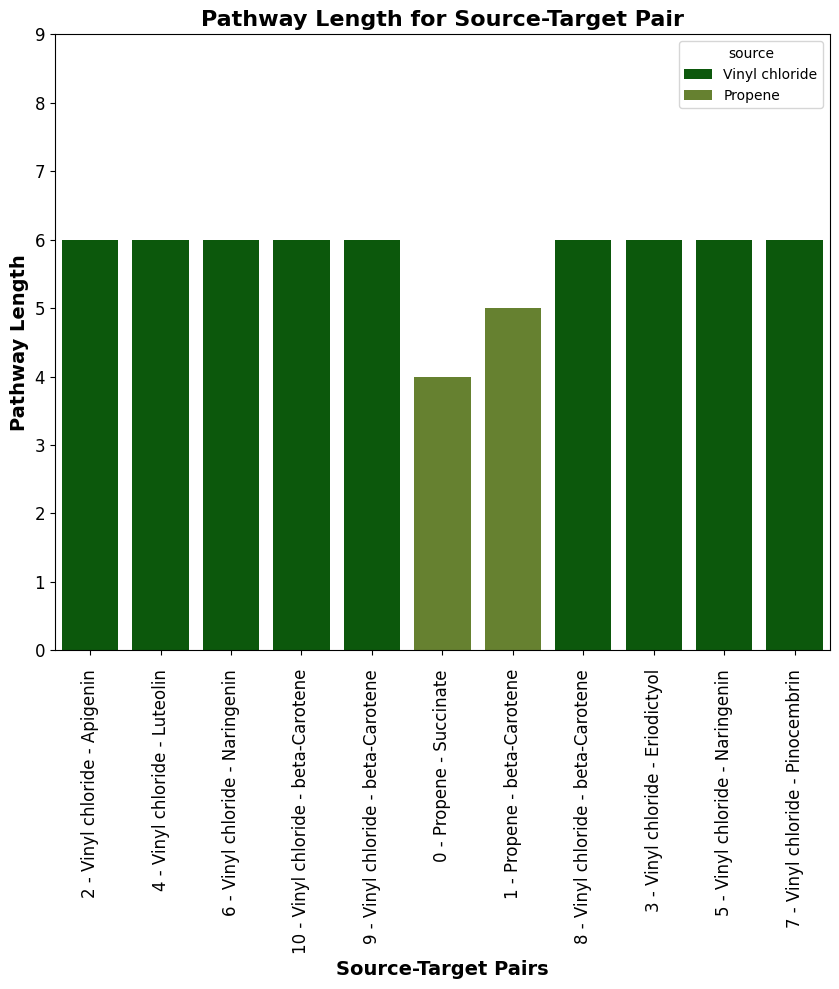

In [17]:
plt.figure(figsize=(10, 8))

# Create a custom  color palette
green_palette = {
    "Vinyl chloride": "darkgreen",
    "Propene": "olivedrab", 
}


# Create a bar plot for each row index and its corresponding value with green color
sns.barplot(x='index_source_target', y='length', data=grouped_df, hue='source', palette=green_palette, dodge=False)

# Set the x and y axis labels
plt.xlabel('Source-Target Pairs', fontsize=14, fontweight='bold')
plt.ylabel('Pathway Length', fontsize=14, fontweight='bold')

# Set the x-axis ticks and labels
plt.xticks(rotation=90, fontsize=12)

# Set the y-axis ticks and labels with more ticks
y_ticks = np.arange(0, 10, (10 - 0) / 10) 
plt.yticks(y_ticks, fontsize=12)

# Increase space between x-axis labels and ticks
ax = plt.gca()
ax.tick_params(axis='x', which='major', pad=10)

# Set the plot title
plt.title('Pathway Length for Source-Target Pair', fontsize=16, fontweight='bold')


# Display the plot
plt.show()

## mean length

In [18]:
counts = [1, 2, 39]
lengths = [4, 5, 6]

total_length = sum([c * l for c, l in zip(counts, lengths)])
total_count = sum(counts)
mean_length = total_length / total_count

print(mean_length)

5.904761904761905
